In [0]:
# The python notebook below contains data preparation and cleaning of an electric car company. The data will be used 
# to analyze the company operations and Identify the most popular hour of the day for picking up a shared electric car (Bluecar) 
# in the city of Paris over the month of April 2018

# IMPORTING FILES / DATASET

In [0]:
# Importing our libraries
#
import pandas as pd
import numpy as np


In [0]:
# Importing our required dataset and previewing the first 10 rows

autolib = pd.read_csv('/content/Autolib_dataset (2).csv')
autolib.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


# DATA PREPARATION-CLEANING DATA

In [0]:
#Checking for non-null values in our dataset

autolib.count()

Address                5000
Cars                   5000
Bluecar counter        5000
Utilib counter         5000
Utilib 1.4 counter     5000
Charge Slots           5000
Charging Status        5000
City                   5000
Displayed comment       111
ID                     5000
Kind                   5000
Geo point              5000
Postal code            5000
Public name            5000
Rental status          5000
Scheduled at             47
Slots                  5000
Station type           5000
Status                 5000
Subscription status    5000
year                   5000
month                  5000
day                    5000
hour                   5000
minute                 5000
dtype: int64

In [0]:

autolib['date']= autolib['year'].astype(str) + autolib['month'].astype(str).str.zfill(2)+ autolib['day'].astype(str).str.zfill(2) + autolib['hour'].astype(str).str.zfill(2) + autolib['minute'].astype(str).str.zfill(2)
autolib['date_time'] = pd.to_datetime(autolib['date'], format='%Y%m%d%H%M')
# Auto
# autolib["date"] = pd.to_datetime(autolib["year"] + autolib["month"].str.zfill(2) + autolib['day'].str.zfill(2) + autolib['hour'].str.zfill(2) + autolib['minute'].str.zfill(2), format='%Y%m%d%H%M')

autolib

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,date,date_time
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,201804081143,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,201804060724,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14,201804032014,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37,201804040437,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23,201804081723,2018-04-08 17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26,201804061126,2018-04-06 11:26:00
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56,201804041656,2018-04-04 16:56:00
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1,201804010701,2018-04-01 07:01:00
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27,201804041727,2018-04-04 17:27:00


In [0]:
# From the above code we can tell the rows that have missing data.
# Since we wont need the comments column, we going to drop the column
# we also drop the Public Name column since they are the same as the ID column
# We also drop the Cars column as it has the same data as Bluecar Counter on every occurence

columns1 = ['Displayed comment','Public name','Geo point','Cars','day', 'month', 'year', 'minute','date']
# autolib.drop(columns=['Displayed comment','Public name','Geo point','Cars'], inplace=True)
autolib.drop(columns=[i for i in columns1], axis =1 ,inplace=True)

autolib.tail()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,hour,date_time
4995,8 avenue MÃ©nelotte,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,92700,operational,NaN,3,station,ok,nonexistent,11,2018-04-06 11:26:00
4996,37 rue de Dantzig,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,75015,operational,NaN,2,station,ok,nonexistent,16,2018-04-04 16:56:00
4997,142 rue du Bac,1,0,0,1,operational,Paris,paris-bac-142,STATION,75007,operational,NaN,4,station,ok,nonexistent,7,2018-04-01 07:01:00
4998,2 avenue du Val de Fontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,operational,NaN,3,station,ok,nonexistent,17,2018-04-04 17:27:00
4999,5 Rue Henry Brisson,4,0,0,0,operational,Paris,paris-henrybrisson-5,STATION,75018,operational,NaN,0,station,ok,nonexistent,10,2018-04-08 10:02:00


In [0]:
#Renaming Columns
autolib.columns = autolib.columns.str.lower().str.replace(" ","_")
autolib

#Puting all the categorical values into lower case

autolib = autolib.astype(str).apply(lambda x: x.str.lower())
autolib.head()

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,rental_status,scheduled_at,slots,station_type,status,subscription_status,hour,date_time
0,2 avenue de suffren,0,0,0,0,nonexistent,paris,paris-suffren-2,station,75015,operational,nan,2,station,ok,nonexistent,11,2018-04-08 11:43:00
1,145 rue raymond losserand,6,0,0,0,operational,paris,paris-raymondlosserand-145,station,75014,operational,nan,0,station,ok,nonexistent,7,2018-04-06 07:24:00
2,2 avenue john fitzgerald kennedy,3,0,2,0,operational,le bourget,lebourget-johnfitzgeraldkennedy-2,station,93350,operational,nan,1,station,ok,nonexistent,20,2018-04-03 20:14:00
3,51 rue eugã¨ne oudinã©,3,1,0,1,operational,paris,paris-eugeneoudine-51,station,75013,operational,nan,2,station,ok,nonexistent,4,2018-04-04 04:37:00
4,6 avenue de la porte de champerret,3,0,0,0,nonexistent,paris,paris-portedechamperret-6,parking,75017,operational,nan,3,station,ok,nonexistent,17,2018-04-08 17:23:00


In [0]:
# droping rows with at scheduled_at column that have future dates and zero resources
# autolib[autolib.scheduled_at == nan]

autolib = autolib[autolib['scheduled_at'] == 'nan']

# droping the scheduled at column from our new dataset

autolib.drop(columns='scheduled_at',inplace=True)

autolib

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,rental_status,slots,station_type,status,subscription_status,hour,date_time
0,2 avenue de suffren,0,0,0,0,nonexistent,paris,paris-suffren-2,station,75015,operational,2,station,ok,nonexistent,11,2018-04-08 11:43:00
1,145 rue raymond losserand,6,0,0,0,operational,paris,paris-raymondlosserand-145,station,75014,operational,0,station,ok,nonexistent,7,2018-04-06 07:24:00
2,2 avenue john fitzgerald kennedy,3,0,2,0,operational,le bourget,lebourget-johnfitzgeraldkennedy-2,station,93350,operational,1,station,ok,nonexistent,20,2018-04-03 20:14:00
3,51 rue eugã¨ne oudinã©,3,1,0,1,operational,paris,paris-eugeneoudine-51,station,75013,operational,2,station,ok,nonexistent,4,2018-04-04 04:37:00
4,6 avenue de la porte de champerret,3,0,0,0,nonexistent,paris,paris-portedechamperret-6,parking,75017,operational,3,station,ok,nonexistent,17,2018-04-08 17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue mã©nelotte,2,0,0,0,nonexistent,colombes,colombes-menelotte-8,station,92700,operational,3,station,ok,nonexistent,11,2018-04-06 11:26:00
4996,37 rue de dantzig,4,0,0,1,operational,paris,paris-dantzig-37,station,75015,operational,2,station,ok,nonexistent,16,2018-04-04 16:56:00
4997,142 rue du bac,1,0,0,1,operational,paris,paris-bac-142,station,75007,operational,4,station,ok,nonexistent,7,2018-04-01 07:01:00
4998,2 avenue du val de fontenay,2,0,0,0,nonexistent,fontenay-sous-bois,fontenaysousbois-valdefontenay-2,station,94120,operational,3,station,ok,nonexistent,17,2018-04-04 17:27:00


In [0]:
# Droping columns with rental_status broken or status closed
autolib = autolib[autolib['rental_status'] != 'broken']
# autolib[autolib['rental_status'] == 'broken']

autolib


,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,rental_status,slots,station_type,status,subscription_status,hour,date_time
0,2 avenue de suffren,0,0,0,0,nonexistent,paris,paris-suffren-2,station,75015,operational,2,station,ok,nonexistent,11,2018-04-08 11:43:00
1,145 rue raymond losserand,6,0,0,0,operational,paris,paris-raymondlosserand-145,station,75014,operational,0,station,ok,nonexistent,7,2018-04-06 07:24:00
2,2 avenue john fitzgerald kennedy,3,0,2,0,operational,le bourget,lebourget-johnfitzgeraldkennedy-2,station,93350,operational,1,station,ok,nonexistent,20,2018-04-03 20:14:00
3,51 rue eugã¨ne oudinã©,3,1,0,1,operational,paris,paris-eugeneoudine-51,station,75013,operational,2,station,ok,nonexistent,4,2018-04-04 04:37:00
4,6 avenue de la porte de champerret,3,0,0,0,nonexistent,paris,paris-portedechamperret-6,parking,75017,operational,3,station,ok,nonexistent,17,2018-04-08 17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue mã©nelotte,2,0,0,0,nonexistent,colombes,colombes-menelotte-8,station,92700,operational,3,station,ok,nonexistent,11,2018-04-06 11:26:00
4996,37 rue de dantzig,4,0,0,1,operational,paris,paris-dantzig-37,station,75015,operational,2,station,ok,nonexistent,16,2018-04-04 16:56:00
4997,142 rue du bac,1,0,0,1,operational,paris,paris-bac-142,station,75007,operational,4,station,ok,nonexistent,7,2018-04-01 07:01:00
4998,2 avenue du val de fontenay,2,0,0,0,nonexistent,fontenay-sous-bois,fontenaysousbois-valdefontenay-2,station,94120,operational,3,station,ok,nonexistent,17,2018-04-04 17:27:00


In [0]:
# droping rows with subscription status = future and station_type = sub centre and station kind = center since they have no resources
# autolib[autolib['subscription_status'] == 'future']
autolib = autolib[autolib['station_type'] != 'subs_center']
# autolib[autolib['kind'] == 'center']



autolib


,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,rental_status,slots,station_type,status,subscription_status,hour,date_time
0,2 avenue de suffren,0,0,0,0,nonexistent,paris,paris-suffren-2,station,75015,operational,2,station,ok,nonexistent,11,2018-04-08 11:43:00
1,145 rue raymond losserand,6,0,0,0,operational,paris,paris-raymondlosserand-145,station,75014,operational,0,station,ok,nonexistent,7,2018-04-06 07:24:00
2,2 avenue john fitzgerald kennedy,3,0,2,0,operational,le bourget,lebourget-johnfitzgeraldkennedy-2,station,93350,operational,1,station,ok,nonexistent,20,2018-04-03 20:14:00
3,51 rue eugã¨ne oudinã©,3,1,0,1,operational,paris,paris-eugeneoudine-51,station,75013,operational,2,station,ok,nonexistent,4,2018-04-04 04:37:00
4,6 avenue de la porte de champerret,3,0,0,0,nonexistent,paris,paris-portedechamperret-6,parking,75017,operational,3,station,ok,nonexistent,17,2018-04-08 17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue mã©nelotte,2,0,0,0,nonexistent,colombes,colombes-menelotte-8,station,92700,operational,3,station,ok,nonexistent,11,2018-04-06 11:26:00
4996,37 rue de dantzig,4,0,0,1,operational,paris,paris-dantzig-37,station,75015,operational,2,station,ok,nonexistent,16,2018-04-04 16:56:00
4997,142 rue du bac,1,0,0,1,operational,paris,paris-bac-142,station,75007,operational,4,station,ok,nonexistent,7,2018-04-01 07:01:00
4998,2 avenue du val de fontenay,2,0,0,0,nonexistent,fontenay-sous-bois,fontenaysousbois-valdefontenay-2,station,94120,operational,3,station,ok,nonexistent,17,2018-04-04 17:27:00


In [0]:
# checking if there are null values remaining

autolib.count()

address                4618
bluecar_counter        4618
utilib_counter         4618
utilib_1.4_counter     4618
charge_slots           4618
charging_status        4618
city                   4618
id                     4618
kind                   4618
postal_code            4618
rental_status          4618
slots                  4618
station_type           4618
status                 4618
subscription_status    4618
hour                   4618
date_time              4618
dtype: int64

# EXPLORING DATASET

In [0]:
# autolib.info()

# changing columns stored as strings to numerical data for easy calculations 

autolib = autolib.apply(pd.to_numeric, errors = 'ignore')
# autolib = autolib.astype(int, errors='ignore')

autolib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4618 entries, 0 to 4999
Data columns (total 17 columns):
address                4618 non-null object
bluecar_counter        4618 non-null int64
utilib_counter         4618 non-null int64
utilib_1.4_counter     4618 non-null int64
charge_slots           4618 non-null int64
charging_status        4618 non-null object
city                   4618 non-null object
id                     4618 non-null object
kind                   4618 non-null object
postal_code            4618 non-null int64
rental_status          4618 non-null object
slots                  4618 non-null int64
station_type           4618 non-null object
status                 4618 non-null object
subscription_status    4618 non-null object
hour                   4618 non-null int64
date_time              4618 non-null object
dtypes: int64(7), object(10)
memory usage: 649.4+ KB


In [0]:
autolib.describe()

,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,hour
count,4618.000000,4618.00000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000
mean,2.526635,0.06453,0.133175,0.274361,82527.600043,2.092248,11.521871
std,1.999308,0.25608,0.369130,0.563373,8813.323677,1.896425,6.883012
min,0.000000,0.00000,0.000000,0.000000,75001.000000,0.000000,0.000000
25%,1.000000,0.00000,0.000000,0.000000,75012.000000,0.000000,6.000000
50%,2.000000,0.00000,0.000000,0.000000,75019.000000,2.000000,12.000000
75%,4.000000,0.00000,0.000000,0.000000,92310.000000,4.000000,17.750000
max,7.000000,2.00000,3.000000,2.000000,95880.000000,7.000000,23.000000


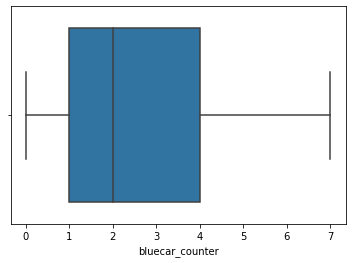

In [0]:
# Identifying outliers in our dataset using IQR

import seaborn as sns

# autolib.info()

sns.boxplot(x = autolib['bluecar_counter'])

# The plot shows no points outside the whiskers, 
# thus no outliers outside out IQR 





# ANSWERING QUESTIONS

Question 1

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018

In [0]:
# Step 1 - selecting paris city only
autolib_paris = autolib[autolib['city']=='paris']

autolib_paris

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,rental_status,slots,station_type,status,subscription_status,hour,date_time
1046,112 rue monge bã¢timent lieu-dit,0,0,0,0,nonexistent,paris,paris-monge-112,station,75005,operational,4,station,ok,nonexistent,0,2018-04-01 00:00:00
2874,44 rue sã©bastien mercier,0,0,0,0,nonexistent,paris,paris-sebastienmercier-44,station,75015,operational,4,station,ok,nonexistent,0,2018-04-01 00:02:00
1107,19 place de la madeleine,0,0,0,0,nonexistent,paris,paris-madeleinetronchet-parking,parking,75008,operational,6,station,ok,nonexistent,0,2018-04-01 00:02:00
2059,2 avenue mozart,1,0,0,0,nonexistent,paris,paris-mozart-2,station,75016,operational,3,station,ok,nonexistent,0,2018-04-01 00:03:00
4453,2 rue neuve saint-pierre,0,0,0,1,operational,paris,paris-neuvesaintpierre-2,station,75004,operational,4,station,ok,nonexistent,0,2018-04-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,19 rue brã©montier,3,0,0,1,operational,paris,paris-bremontier-19,station,75017,operational,2,station,ok,nonexistent,23,2018-04-09 23:42:00
2672,11 rue gerbert,2,0,1,0,operational,paris,paris-gerbert-11,station,75015,operational,0,station,ok,nonexistent,23,2018-04-09 23:48:00
4582,82 rue de crimã©e,5,0,0,0,operational,paris,paris-crimee-82,station,75019,operational,1,station,ok,nonexistent,23,2018-04-09 23:56:00
4443,31 bis rue du faubourg montmartre,0,0,0,0,nonexistent,paris,paris-faubourgmontmartre-31,station,75009,operational,3,station,ok,nonexistent,23,2018-04-09 23:58:00


In [0]:
# monitoring when the bluecars were available and not available by using the diff() function
# the function shows the difference of the vehicles available by taking the above row and subtracting the next row and updating the new value
# if the value at the column is negative, means the blue car is not available.

# df.diff(axis = 0, periods = 1) 

autolib_paris['bluecar_status']= autolib.loc[:,'bluecar_counter'].diff()
autolib_paris




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,rental_status,slots,station_type,status,subscription_status,hour,date_time,bluecar_status
1046,112 rue monge bã¢timent lieu-dit,0,0,0,0,nonexistent,paris,paris-monge-112,station,75005,operational,4,station,ok,nonexistent,0,2018-04-01 00:00:00,NaN
2874,44 rue sã©bastien mercier,0,0,0,0,nonexistent,paris,paris-sebastienmercier-44,station,75015,operational,4,station,ok,nonexistent,0,2018-04-01 00:02:00,0.0
1107,19 place de la madeleine,0,0,0,0,nonexistent,paris,paris-madeleinetronchet-parking,parking,75008,operational,6,station,ok,nonexistent,0,2018-04-01 00:02:00,0.0
2059,2 avenue mozart,1,0,0,0,nonexistent,paris,paris-mozart-2,station,75016,operational,3,station,ok,nonexistent,0,2018-04-01 00:03:00,1.0
4453,2 rue neuve saint-pierre,0,0,0,1,operational,paris,paris-neuvesaintpierre-2,station,75004,operational,4,station,ok,nonexistent,0,2018-04-01 00:04:00,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,19 rue brã©montier,3,0,0,1,operational,paris,paris-bremontier-19,station,75017,operational,2,station,ok,nonexistent,23,2018-04-09 23:42:00,3.0
2672,11 rue gerbert,2,0,1,0,operational,paris,paris-gerbert-11,station,75015,operational,0,station,ok,nonexistent,23,2018-04-09 23:48:00,0.0
4582,82 rue de crimã©e,5,0,0,0,operational,paris,paris-crimee-82,station,75019,operational,1,station,ok,nonexistent,23,2018-04-09 23:56:00,3.0
4443,31 bis rue du faubourg montmartre,0,0,0,0,nonexistent,paris,paris-faubourgmontmartre-31,station,75009,operational,3,station,ok,nonexistent,23,2018-04-09 23:58:00,-5.0


In [0]:
# Selecting the most popular hour column 
autolib_paris[(autolib_paris['bluecar_status'] < 0)].groupby(['hour'])['bluecar_counter'].count().sort_values(ascending=False).head(1)


hour
21    69
Name: bluecar_counter, dtype: int64

Question 2 

What is the most popular hour for returning cars?


In [0]:
autolib_paris[(autolib_paris['bluecar_status'] > 0)].groupby(['hour'])['bluecar_counter'].count().sort_values(ascending=False).head(1)


hour
18    45
Name: bluecar_counter, dtype: int64

Question 3a

What station is the most popular?
Overall?


In [0]:

autolib['id'].value_counts().head(1)



paris-portedemontrouge-8    13
Name: id, dtype: int64

Question 3b

At the most popular picking hour?
